In [ ]:
Завдання 2
Вивести курс за останній рік лише по понеділках (https://bank.gov.ua/ua/open-data/api-dev)
відобразити динаміку з допомогою мат плот ліб, та також побудувати лінію тренду

In [15]:
import datetime
import requests
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

today = datetime.date.today()
new_year = datetime.date(2020, 1, 1)
delta = today - new_year
print(f'З початку року {delta.days} днів')

З початку року 316 днів


In [12]:
list_with_values = {}
s = 1
for i in range(delta.days + 1):
    tmp_date = new_year + datetime.timedelta(days = i)
    if tmp_date.weekday() == 0:
        par = {'valcode': 'USD', 'date': tmp_date.strftime('%Y%m%d')}
        req = requests.get('https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?json', params = par).json()
        list_with_values[s] = req[0]['rate']
        s += 1

In [13]:
list_with_values

{1: 23.6862,
 2: 23.9677,
 3: 24.2527,
 4: 24.3301,
 5: 25.0294,
 6: 24.537,
 7: 24.447,
 8: 24.453,
 9: 24.59,
 10: 24.7413,
 11: 26.089,
 12: 27.7386,
 13: 28.183,
 14: 27.373,
 15: 27.2022,
 16: 27.2022,
 17: 27.1441,
 18: 26.9592,
 19: 26.8185,
 20: 26.638,
 21: 26.7556,
 22: 26.8685,
 23: 26.6953,
 24: 26.7303,
 25: 26.7207,
 26: 26.7002,
 27: 27.1716,
 28: 26.9505,
 29: 27.3606,
 30: 27.7559,
 31: 27.6798,
 32: 27.6486,
 33: 27.3474,
 34: 27.4812,
 35: 27.4759,
 36: 27.7325,
 37: 27.9003,
 38: 28.1718,
 39: 28.2673,
 40: 28.3408,
 41: 28.2098,
 42: 28.3649,
 43: 28.2911,
 44: 28.4507,
 45: 28.1375}

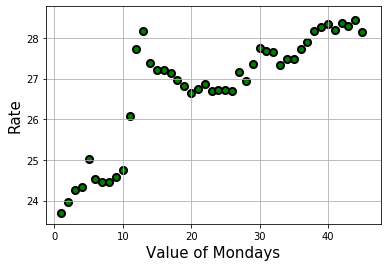

In [14]:
ax = plt.subplot()
ax.set_xlabel('Value of Mondays', fontsize = 15)
ax.set_ylabel('Rate', fontsize = 15)
plt.grid()
for i in list_with_values:
    plt.scatter(x = i, y = list_with_values[i], s = 50, color = 'g', linewidths=2, edgecolors='black')

In [16]:
X = list(list_with_values.keys())
y = list(list_with_values.values())
X = np.array(X).reshape((-1, 1))
y = np.array(y)

In [17]:
model = LinearRegression()
model.fit(X, y)
print(f'Точність моделі складає {model.score(X, y)}')

Точність моделі складає 0.7280722564251643


In [18]:
k, b = model.coef_, model.intercept_
print(f'Лінія регресії: у = {float(k)}x + {b}')

Лінія регресії: у = 0.09114996047430834x + 24.672239797979802


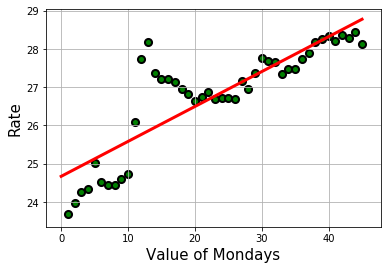

In [19]:
ax = plt.subplot()
ax.set_xlabel('Value of Mondays', fontsize = 15)
ax.set_ylabel('Rate', fontsize = 15)

x = np.linspace(0, 45, 2)
plt.plot(x, k*x + b, 'r', linewidth=3)
plt.grid()
for i in list_with_values:
    plt.scatter(x = i, y = list_with_values[i], s = 50, color = 'g', linewidths=2, edgecolors='black')